<a href="https://colab.research.google.com/github/parkerleipzig5/QMBE-3730-Parker-Leipzig/blob/main/ClassificationModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. There are 2000 rows and 21 columns.

2. pct_card_over_50_uti has 1958 missing.
values and rep_income has 1559 missing.
rep_education has 1 missing.

3. No duplicates and 2 types of data (float, int)

4. There isn't any duplicates so we don't have to worry about removing them but they would be removed so the model is accurate.

5. This scatter plot will help visualize the relationship between total balance and credit card utilization. A strong correlation might suggest that individuals with higher balances tend to have higher utilization rates.
This box plot will show how reported income varies by education level. It could highlight whether higher education levels are associated with higher income levels.

6. Education level 3

7. No. It's split 80/20. If an imbalance exists, techniques like oversampling (increasing the minority class instances), undersampling (reducing the majority class instances) can be used.

8. A right-skewed distribution was identified, it would indicate that most individuals have lower incomes, with a few having significantly higher incomes.

9. If a particular education group has a higher default rate, it may indicate that education level correlates with financial risk.

10. Nothing caught my eye

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [7]:
# Load the dataset
df = pd.read_csv("/content/loan_default_data_set.csv")

In [17]:
# Handle missing values
num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")
df.loc[:, num_cols] = imputer.fit_transform(df[num_cols])


In [8]:
# Exploratory Data Analysis (EDA)
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
print("Missing values per column:")
print(df.isnull().sum())

Shape of the dataset: (20000, 21)
Columns in the dataset: Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
       'credit_card_age', 'num_acc_30d_past_due_12_months',
       'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
       'tot_amount_currently_past_due', 'num_inq_12_month',
       'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
       'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
       'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
       'Def_ind'],
      dtype='object')
Missing values per column:
tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month         

In [18]:
# Check for duplicates in rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Check for duplicate columns
duplicated_columns = df.T.duplicated().sum()
print("Number of duplicate columns:", duplicated_columns)
if duplicated_columns > 0:
    df = df.loc[:, ~df.T.duplicated()]

Number of duplicate rows: 0
Number of duplicate columns: 0


In [21]:
# Handle duplicates
df = df.drop_duplicates()

In [20]:
# Data types
print("Data types:")
print(df.dtypes)

Data types:
tot_balance                        float64
avg_bal_cards                      float64
credit_age                           int64
credit_age_good_account              int64
credit_card_age                      int64
num_acc_30d_past_due_12_months       int64
num_acc_30d_past_due_6_months        int64
num_mortgage_currently_past_due      int64
tot_amount_currently_past_due      float64
num_inq_12_month                     int64
num_card_inq_24_month                int64
num_card_12_month                    int64
num_auto_ 36_month                   int64
uti_open_card                      float64
pct_over_50_uti                    float64
uti_max_credit_line                float64
pct_card_over_50_uti               float64
ind_XYZ                              int64
rep_income                         float64
rep_education                        int64
Def_ind                              int64
dtype: object


In [14]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

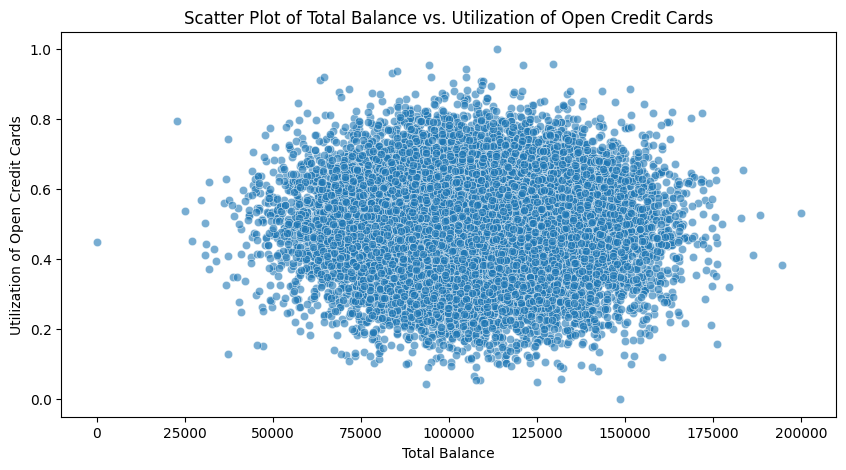

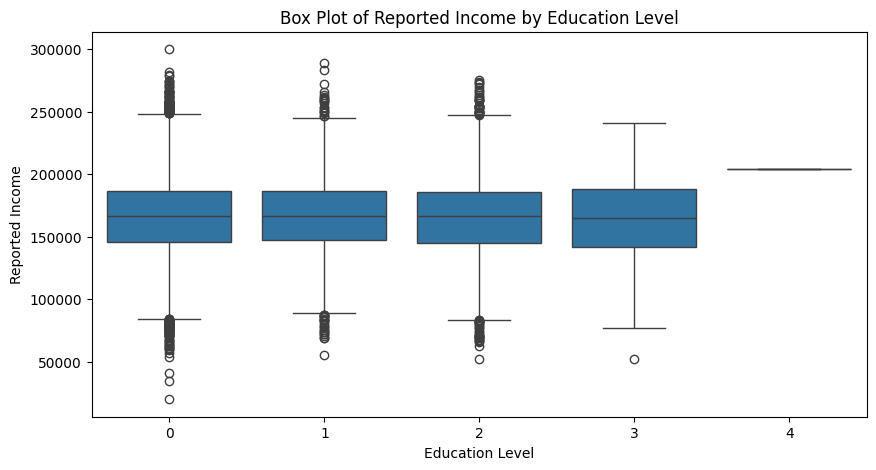

In [29]:
# Plotting two random variables
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['tot_balance'], y=df['uti_open_card'], alpha=0.6)
plt.title("Scatter Plot of Total Balance vs. Utilization of Open Credit Cards")
plt.xlabel("Total Balance")
plt.ylabel("Utilization of Open Credit Cards")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['rep_education'], y=df['rep_income'])
plt.title("Box Plot of Reported Income by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Reported Income")
plt.show()

In [32]:
# Checking class imbalance
default_counts = df['Def_ind'].value_counts()
print("Default status class distribution:")
print(default_counts)

Default status class distribution:
Def_ind
0    18000
1     2000
Name: count, dtype: int64


In [42]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['Def_ind'])
y = df['Def_ind']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [45]:
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# k-NN model
accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 4)
precision_knn = round(precision_score(y_test, y_pred_knn), 4)
recall_knn = round(recall_score(y_test, y_pred_knn), 4)

# Decision Tree model
accuracy_dt = round(accuracy_score(y_test, y_pred_dt), 4)
precision_dt = round(precision_score(y_test, y_pred_dt), 4)
recall_dt = round(recall_score(y_test, y_pred_dt), 4)

# Printing the results
print("k-NN Accuracy:", accuracy_knn)
print("k-NN Precision:", precision_knn)
print("k-NN Recall:", recall_knn)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)


k-NN Accuracy: 0.8978
k-NN Precision: 0.4922
k-NN Recall: 0.1548
Decision Tree Accuracy: 0.8598
Decision Tree Precision: 0.3311
Decision Tree Recall: 0.371


In [47]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for k-NN:")
print(cm_knn)
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

Confusion Matrix for k-NN:
[[3528   65]
 [ 344   63]]
Confusion Matrix for Decision Tree:
[[3288  305]
 [ 256  151]]


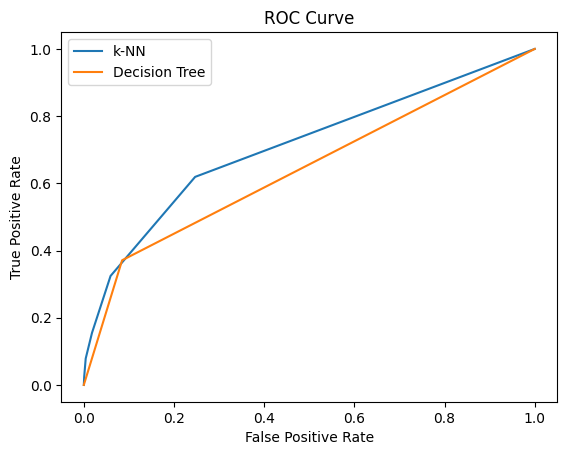

In [40]:
# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_knn, tpr_knn, label="k-NN")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

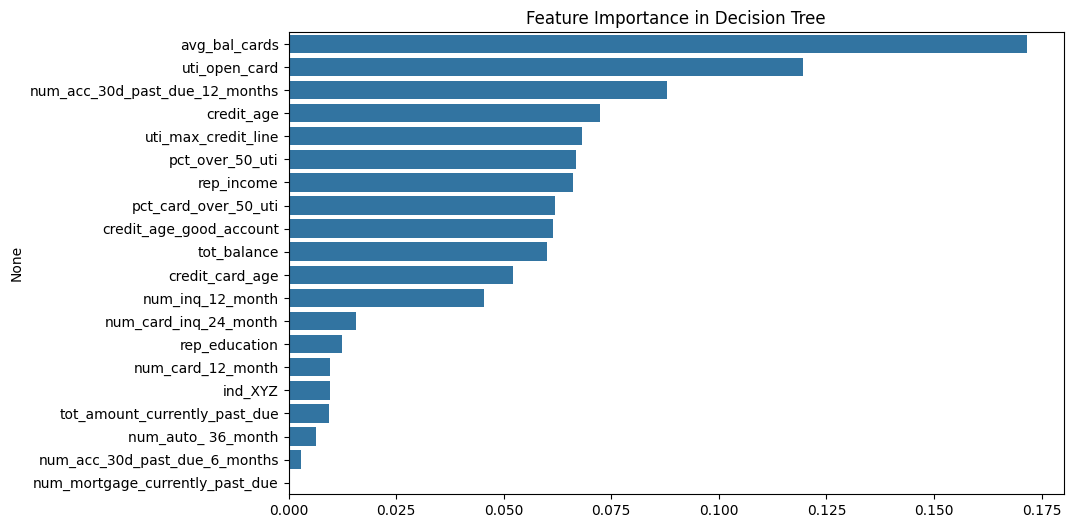

In [41]:
# Feature Importance
feature_importance = dt.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names[sorted_idx])
plt.title("Feature Importance in Decision Tree")
plt.show()

1. High accuracy but low precision and recall suggests that the model might be favoring the negative class (predicting many more negative outcomes correctly) but struggling to correctly identify the positive class.

2. k-NN seems to be better at avoiding false positives, while the Decision Tree has a slightly better ability to correctly predict positives.

4. Top three are (avg_bal_card, uti_open_card, num_acc_30d_past_due__months

5. The k-NN because the accuracy, precision, and recall are higher.